In [ ]:
# conda install -c conda-forge mat-miner

In [2]:
import pandas as pd
import numpy as np
import re
import csv
import requests
import os
import warnings

warnings.filterwarnings('ignore')
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval
#from matminer.data_retrieval.retrieve_Citrine import CitrineDataRetrieval
pd.set_option('display.max_columns', None)

In [5]:
#Data mining from Materials Project
df_mp = (
    MPDataRetrieval(api_key="pXqDFffMQGxF4BC910x").get_dataframe(criteria={} ,
         properties=
            ['band_gap',
             'formula',
             'structure',
             'spacegroup',
             'e_above_hull',
             'elements',
             'spacegroup.number']
        )
)

df_mp.to_csv('ds_PV.csv')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126335/126335 [13:15<00:00, 158.88it/s]


In [1]:
#Data pre-processing
ds = pd.read_csv('ds_PV.csv')
ds = ds[ds['band_gap'] >= 0.5]
ds = ds[ds['band_gap'] < 4]
ds
row = []
regex = r"^(Full Formula\s+\()(.+)\)"
 

def hasFormula(formula, spacegroup,id):
 
	m = re.search(regex, formula)
	if m:
    	print(m.group(2))
 
 
d = ds.apply(lambda x: hasFormula(x['structure'], x.spacegroup, x.name), axis=1)
row = []
regex = r"^(Full Formula\s+\()(.+)\)"
regex_spacegroup=r"(.*symbol\':\s+\')(\S+)(\'.+)"
 
def hasFormula(formula, spacegroup,id):
 
	m = re.search(regex, formula)
	s = re.search(regex_spacegroup,spacegroup)
	if m:
    	print("formula: ", m.group(2))
	if s:
    	print("spacegroup: ", s.group(2))
 
 
 
d = ds.apply(lambda x: hasFormula(x['structure'], x.spacegroup, x.name), axis=1)
def filter_structure(structure):
	m = re.search(regex, structure)
	if m:
    	return m.group(2)
	return "No"
ds["new_formula"] = ds["structure"].map(lambda f: filter_structure(f))
ds
 

In [9]:
ds_MP = pd.read_csv('ds_PV.csv', chunksize=100)

In [14]:
ds_MP_chunk = next(ds_MP)

In [35]:
ds_MP_chunk.head(1)

,material_id,band_gap,formula,structure,spacegroup,e_above_hull,elements,spacegroup.number
0,mp-1002206,0.0,"{'Si': 1.0, 'C': 1.0}",Full Formula (Si1 C1)\nReduced Formula: SiC\na...,"{'symprec': 0.1, 'source': 'spglib', 'symbol':...",0.742811,"['Si', 'C']",225


In [31]:
id = ds_MP_chunk.head(1)['material_id'].astype('str')

0    mp-1002206
Name: material_id, dtype: object

In [ ]:
#Get cif

file = open("theory_21_02.csv")
csvreader = csv.reader(file)
header = next(csvreader)
for row in csvreader:
    id = row[5]
    r = requests.get('https://materialsproject.org/materials/' + 'mp-1002206' + '/cif?computed&download=true')
    open("cif_theory/" + id + '.cif', 'wb').write(r.content)
 
file.close()

with open('cif/test.cif', 'w') as f:
    f.write(str(r.content))
df = pd.read_csv("theory_21_02.csv")
new_data=df.copy()
def get_id(mp):
    r=requests.get("https://materialsproject.org/rest/v2/materials/%s/vasp?API_KEY=VujoLAibQxL0y7Ii"%mp)
    if r.status_code == 200:
        res=r.json()
        if len(res["response"]) >0:
            icsd_ids=res["response"][0]["icsd_ids"]
            if len(icsd_ids)>0:
                return icsd_ids[0]
    return 0
new_data["icsd_id"]=new_data["material_id"].apply(lambda x:get_id(x))
new_data.to_csv("theory_22_02.csv")

In [43]:
str(id[0])

'mp-1002206'

In [40]:
#Get cif

r = requests.get('https://materialsproject.org/materials/' + 'mp-1002206' + '/cif?computed&download=true')
 
with open('mp-1002206.cif', 'w') as f:
    f.write(str(r.content))

In [ ]:
#Get cif
file = open("theory_21_02.csv")
csvreader = csv.reader(file)
header = next(csvreader)
for row in csvreader:
	id = row[5]
	r = requests.get('https://materialsproject.org/materials/' + id + '/cif?computed&download=true')
    open("cif_theory/" + id + '.cif', 'wb').write(r.content)
 
file.close()

with open('cif/test.cif', 'w') as f:
    f.write(str(r.content))
    
df = pd.read_csv("theory_21_02.csv")
new_data=df.copy()
def get_id(mp):
    r=requests.get("https://materialsproject.org/rest/v2/materials/%s/vasp?API_KEY=VujoLAibQxL0y7Ii"%mp)
	if r.status_code == 200:
    	res=r.json()
    	if len(res["response"]) >0:
            icsd_ids=res["response"][0]["icsd_ids"]
        	if len(icsd_ids)>0:
                return icsd_ids[0]
	return 0
new_data["icsd_id"]=new_data["material_id"].apply(lambda x:get_id(x))
new_data.to_csv("theory_22_02.csv")


#### Import data from Jarvis

In [16]:
import ast
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import zlib
pd.set_option('display.max_columns', None)
%matplotlib inline

In [17]:
with open('Jarvis/ENdiele-20.json','r') as f:
    file = f.read()

In [ ]:
# evaluate list as str -> list as object
file = ast.literal_eval(file)

In [ ]:
print(file[0])

In [ ]:
df = pd.DataFrame.from_records(file)

In [84]:
with open('Jarvis/ENdiele-20.zpkl', 'wb') as f:
    f.write(zlib.compress(pickle.dumps(df)))

In [4]:
df = pd.read_pickle('Jarvis/ENdiele-20.pkl')

In [5]:
sorted(list(df.columns))

['cif',
 'jid',
 'mbj_dos_enenrgies',
 'mbj_dos_up',
 'mbj_en',
 'mbj_gap',
 'mbj_imagxx',
 'mbj_imagxy',
 'mbj_imagyy',
 'mbj_imagyz',
 'mbj_imagzx',
 'mbj_imagzz',
 'mbj_realxx',
 'mbj_realxy',
 'mbj_realyy',
 'mbj_realyz',
 'mbj_realzx',
 'mbj_realzz',
 'mbj_totcputime_per_core',
 'mpid',
 'opt_dos_enenrgies',
 'opt_dos_energies',
 'opt_dos_up',
 'opt_en',
 'opt_gap',
 'opt_imagxx',
 'opt_imagxy',
 'opt_imagyy',
 'opt_imagyz',
 'opt_imagzx',
 'opt_imagzz',
 'opt_realxx',
 'opt_realxy',
 'opt_realyy',
 'opt_realyz',
 'opt_realzx',
 'opt_realzz',
 'opt_totcputime_per_core']

In [15]:
dfx = df.loc[:, 'mbj_imagxx'].dropna

<bound method Series.dropna of 0      na
1      na
2      na
3      na
4      na
       ..
280    na
281    na
282    na
283    na
284    na
Name: mbj_imagxx, Length: 285, dtype: object>

In [48]:
# get all columns' names with specific mask xxx_type for DataFrame

def get_xxx_types(df: pd.DataFrame, xxx_type_mask: str) -> list:
    return [col for col in list(df.columns) if col[:8] == xxx_type_mask]

In [49]:
# get xxx_type -> Y for specific column and mpid

def get_data_YY(df: pd.DataFrame, mpid:str, xxx_type: str) -> list:
    return list(df[df['mpid'] == mpid][xxx_type])[0]

In [63]:
# build graphs for all specific xxx_types: 

def plot_xxx_type(df:pd.DataFrame, xxx_type_mask:str, mpid: str):
    
    xxx_type_cols = get_xxx_types(df, xxx_type_mask)
    xxx_type_YYs = [get_data_YY(df, mpid, col) for col in xxx_type_cols]    
    
    for x in xxx_type_YYs:
        # print('xxx_type', type(x), x[0])
        plt.plot(x)
        plt.yscale('log')
        plt.legend(xxx_type_cols)
        plt.title(xxx_type_mask)
    plt.show()

In [64]:
mpid = 'mp-764221'

In [65]:
xxx_types = ['opt_real','opt_imag','mbj_real','mbj_imag']

In [ ]:
for x in xxx_types:
    plot_xxx_type(df, x, mpid)

In [70]:
# build graphs for all specific xxx_types: 

def plot_xxx_type(df:pd.DataFrame, xxx_type_mask:str, mpid: str):
    
    xxx_type_cols = get_xxx_types(df, xxx_type_mask)
    xxx_type_YYs = [get_data_YY(df, mpid, col) for col in xxx_type_cols]
    
    plt.plot(x)
    plt.yscale('log')
    plt.legend(xxx_type_cols)
    plt.title(xxx_type_mask)
    
    return xxx_type_cols, xxx_type_YYs

/var/folders/r0/sh_xx3ms6_j0__w1_7f87p540000gq/T/ipykernel_95082/539847952.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/usr/local/Caskroom/miniforge/base/envs/env_py39/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


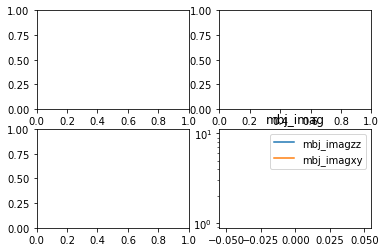

In [71]:
fig, axs = plt.subplots(2, 2)
y, legend = plot_xxx_type(df, xxx_types[0], mpid)
plt.legend(xxx_type_cols)
plt.title(xxx_type_mask)
axs[0, 0].plot(y)
axs[0, 1].plot(y)
axs[1, 0].plot(y)
axs[1, 1].plot(y)
for ax in axs:
    plot_xxx_type(df, x, mpid)

2


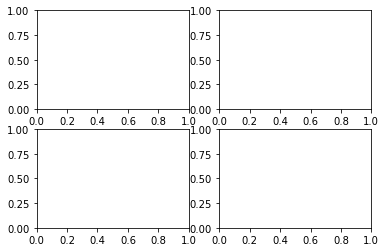

In [77]:
fig, axs = plt.subplots(2, 2)
print(len(axs))

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
Jarvis join Experimental